In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os
import shutil

In [2]:
def clear_output_files():
    if os.path.exists('./results'):
       shutil.rmtree('./results')
    try:
        os.makedirs('./results/confusion matrix')
        os.makedirs('./results/classifiction report')
    except OSError:
        pass

clear_output_files()

In [3]:
input_dataframe = pd.read_csv('preprocessed-file.csv')
input_dataframe

,Severity,Start_Lat,Start_Lng,Zipcode,State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),...,Start_Time_Year,Start_Time_Month,Start_Time_Day,Start_Time_Hour,Start_Time_Minute,End_Time_Year,End_Time_Month,End_Time_Day,End_Time_Hour,End_Time_Minute
0,3,39.865147,-84.058723,45424.0,35.0,36.9,0.0,91.0,29.68,10.0,...,2016,2,8,5,46,2016,2,8,11,0
1,2,39.928059,-82.831184,430683402.0,35.0,37.9,0.0,100.0,29.65,10.0,...,2016,2,8,6,7,2016,2,8,6,37
2,2,39.063148,-84.032608,45176.0,35.0,36.0,33.3,100.0,29.67,10.0,...,2016,2,8,6,49,2016,2,8,7,19
3,3,39.747753,-84.205582,45417.0,35.0,35.1,31.0,96.0,29.64,9.0,...,2016,2,8,7,23,2016,2,8,7,53
4,2,39.627781,-84.188354,45459.0,35.0,36.0,33.3,89.0,29.65,6.0,...,2016,2,8,7,39,2016,2,8,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145836,2,34.055160,-118.214070,90033.0,5.0,82.0,0.0,49.0,29.68,10.0,...,2017,8,30,20,1,2017,8,31,2,1
2145837,2,34.046740,-118.214800,90033.0,5.0,82.0,0.0,49.0,29.68,10.0,...,2017,8,30,20,1,2017,8,31,2,1
2145838,3,34.031850,-117.135910,92373.0,5.0,98.6,0.0,19.0,29.75,6.0,...,2017,8,30,20,3,2017,8,31,2,3
2145839,4,34.277860,-118.608280,91311.0,5.0,95.0,0.0,22.0,29.69,10.0,...,2017,8,30,20,49,2017,8,31,2,49


In [4]:
# input_dataframe = input_dataframe[(input_dataframe['Start_Time_Year'] == 2019) | (input_dataframe['Start_Time_Year'] == 2018)]
# input_dataframe

In [5]:
input_dataframe= input_dataframe[:5000] #keep 5000
# input_dataframe = input_dataframe[(input_dataframe['Start_Time_Year'] == 2019)]
# input_dataframe

In [6]:
# input_dataframe['Start_Time_Year'].unique()

In [7]:
Y = input_dataframe.Severity.values
cols = input_dataframe.shape[1]
X = input_dataframe.loc[:, input_dataframe.columns != 'Severity']
X.columns

Index(['Start_Lat', 'Start_Lng', 'Zipcode', 'State', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Start_Time_Year', 'Start_Time_Month', 'Start_Time_Day',
       'Start_Time_Hour', 'Start_Time_Minute', 'End_Time_Year',
       'End_Time_Month', 'End_Time_Day', 'End_Time_Hour', 'End_Time_Minute'],
      dtype='object')

In [8]:
X

,Start_Lat,Start_Lng,Zipcode,State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),...,Start_Time_Year,Start_Time_Month,Start_Time_Day,Start_Time_Hour,Start_Time_Minute,End_Time_Year,End_Time_Month,End_Time_Day,End_Time_Hour,End_Time_Minute
0,39.865147,-84.058723,45424.0,35.0,36.9,0.0,91.0,29.68,10.0,0.0,...,2016,2,8,5,46,2016,2,8,11,0
1,39.928059,-82.831184,430683402.0,35.0,37.9,0.0,100.0,29.65,10.0,0.0,...,2016,2,8,6,7,2016,2,8,6,37
2,39.063148,-84.032608,45176.0,35.0,36.0,33.3,100.0,29.67,10.0,3.5,...,2016,2,8,6,49,2016,2,8,7,19
3,39.747753,-84.205582,45417.0,35.0,35.1,31.0,96.0,29.64,9.0,4.6,...,2016,2,8,7,23,2016,2,8,7,53
4,39.627781,-84.188354,45459.0,35.0,36.0,33.3,89.0,29.65,6.0,3.5,...,2016,2,8,7,39,2016,2,8,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,38.633095,-121.212936,95670.0,5.0,53.6,0.0,77.0,30.09,10.0,8.1,...,2016,11,30,16,34,2016,11,30,17,19
4996,38.996517,-121.109039,95602.0,5.0,48.2,0.0,87.0,30.08,10.0,3.5,...,2016,11,30,16,39,2016,11,30,17,23
4997,38.996517,-121.109039,95602.0,5.0,48.2,0.0,87.0,30.08,10.0,3.5,...,2016,11,30,16,40,2016,11,30,17,25
4998,38.938461,-121.095970,956032553.0,5.0,51.8,0.0,76.0,30.08,10.0,5.8,...,2016,11,30,15,58,2016,11,30,17,12


In [9]:
X_train, X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.33, random_state=99)


In [10]:
# Support Vector Machines
# svc = SVC()
# svc.fit(X_train, Y_train)
# Y_pred = svc.predict(X_test)
# acc_svc = round(svc.score(X_test, Y_test) * 100, 2)
# sns.heatmap(confusion_matrix(Y_test, Y_pred),annot=True,fmt="d") 
# plt.savefig('results/confusion matrix/SVC.png')
# plt.show()
# pd.DataFrame(classification_report(Y_test,Y_pred, output_dict=True)).transpose().to_csv('results/classifiction report/SVC.csv')
# print(acc_svc)

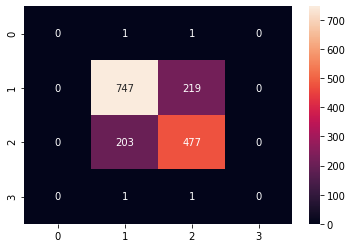

74.18


In [11]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test, Y_test) * 100, 2)
sns.heatmap(confusion_matrix(Y_test, Y_pred),annot=True,fmt="d") 
plt.savefig('results/confusion matrix/knn.png')
plt.show()
pd.DataFrame(classification_report(Y_test,Y_pred, output_dict=True)).transpose().to_csv('results/classifiction report/knn.csv')
print(acc_knn)

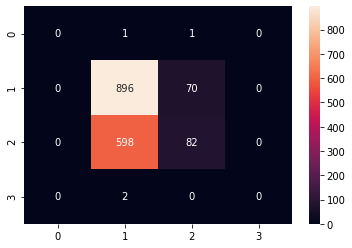

59.46


In [12]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
sns.heatmap(confusion_matrix(Y_test, Y_pred),annot=True,fmt="d") 
plt.savefig('results/confusion matrix/logistic_regression.png')
plt.show()
pd.DataFrame(classification_report(Y_test,Y_pred, output_dict=True)).transpose().to_csv('results/classifiction report/logistic_regression.csv')
print(acc_log)

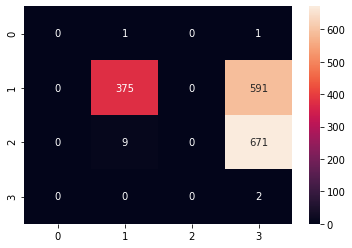

22.85


In [13]:
# # Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test, Y_test) * 100, 2)
sns.heatmap(confusion_matrix(Y_test, Y_pred),annot=True,fmt="d") 
plt.savefig('results/confusion matrix/gaussian_nb.png')
plt.show()
pd.DataFrame(classification_report(Y_test,Y_pred, output_dict=True)).transpose().to_csv('results/classifiction report/gaussian_nb.csv')
print(acc_gaussian)

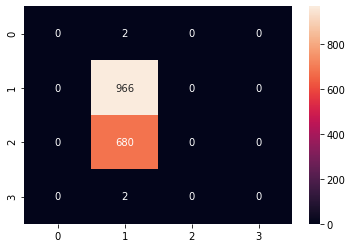

58.55


In [14]:
#  Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_test, Y_test) * 100, 2)
sns.heatmap(confusion_matrix(Y_test, Y_pred),annot=True,fmt="d") 
plt.savefig('results/confusion matrix/perceptron.png')
plt.show()
pd.DataFrame(classification_report(Y_test,Y_pred, output_dict=True)).transpose().to_csv('results/classifiction report/perceptron.csv')
print(acc_perceptron)


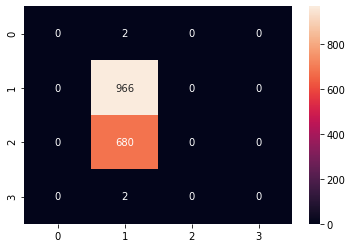

58.55


In [15]:
# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=1200000)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_test, Y_test) * 100, 2)
sns.heatmap(confusion_matrix(Y_test, Y_pred),annot=True,fmt="d") 
plt.savefig('results/confusion matrix/SGD.png')
plt.show()
pd.DataFrame(classification_report(Y_test,Y_pred, output_dict=True)).transpose().to_csv('results/classifiction report/SGD.csv')
print(acc_sgd)


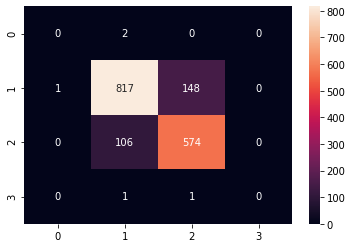

84.3


In [16]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)
sns.heatmap(confusion_matrix(Y_test, Y_pred),annot=True,fmt="d") 
plt.savefig('results/confusion matrix/decision_tree.png')
plt.show()
pd.DataFrame(classification_report(Y_test,Y_pred, output_dict=True)).transpose().to_csv('results/classifiction report/decision_tree.csv')
print(acc_decision_tree)

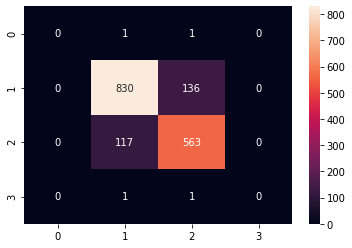

84.42


In [17]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state = 4)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)
sns.heatmap(confusion_matrix(Y_test, Y_pred),annot=True,fmt="d") 
plt.savefig('results/confusion matrix/random_forest.png')
plt.show()
pd.DataFrame(classification_report(Y_test,Y_pred, output_dict=True)).transpose().to_csv('results/classifiction report/random_forest.csv')
print(acc_random_forest)


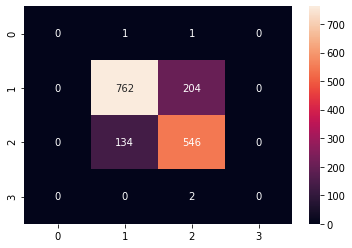

79.27


In [21]:
gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=6)
gradient_boosting.fit(X_train, Y_train)
Y_pred = gradient_boosting.predict(X_test)
gradient_boosting.score(X_train, Y_train)
acc_gradient_boosting = round(gradient_boosting.score(X_test, Y_test) * 100, 2)
sns.heatmap(confusion_matrix(Y_test, Y_pred),annot=True,fmt="d")
plt.savefig('results/confusion matrix/gradient_boosting.png')
plt.show()
pd.DataFrame(classification_report(Y_test,Y_pred, output_dict=True)).transpose().to_csv('results/classifiction report/gradient_boosting.csv')
print(acc_gradient_boosting)

In [22]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron',
              'Stochastic Gradient Decent',
              'Decision Tree','Gradient Boosting'],
    'Score': [acc_knn, acc_log,
              acc_random_forest, acc_gaussian, acc_perceptron,
              acc_sgd, acc_decision_tree, acc_gradient_boosting]})
models.sort_values(by='Score', ascending=False).to_csv("results/prediction-score.csv")